In [1]:
import pandas as pd
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 200)

import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set(style="whitegrid")

In [2]:
df = pd.read_csv('final_final_data.csv', index_col=0)

In [3]:
df

,host_is_superhost,host_has_profile_pic,host_identity_verified,accommodates,bedrooms,beds,price,has_availability,availability_30,availability_60,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,description_count,host_since_year,log_price,dist_diff,email,facebook,google,government_id,identity_manual,jumio,kba,offline_government_id,phone,reviews,selfie,sent_id,weibo,work_email,zhima_selfie,Airconditioning,BBQgrill,Bathtub,Beachessentials,Beachfront,Bedlinens,Breakfast,Buildingstaff,CableTV,Changingtable,Cleaningbeforecheckout,Coffeemaker,Cookingbasics,Crib,Dishesandsilverware,Dishwasher,Dryer,Elevator,Essentials,Extrapillowsandblankets,Fireextinguisher,Fireplaceguards,Firstaidkit,Freeparkingonpremises,Freestreetparking,Gardenorbackyard,Gym,Hairdryer,Hangers,Hostgreetsyou,Hottub,Hotwater,Indoorfireplace,Iron,Keypad,Kitchen,Lakeaccess,Lockonbedroomdoor,Lockbox,Longtermstaysallowed,Luggagedropoffallowed,Microwave,Oven,Paidparkingonpremises,Patioorbalcony,Pocketwifi,Pool,Privateentrance,Privatelivingroom,Refrigerator,Shampoo,Showergel,Singlelevelhome,Smokealarm,Stairgates,Stove,TV,Washer,Waterfront,Wifi,Windowguards,hotel_room,private_room,shared_room,Brooklyn,Manhattan,Queens,StatenIsland
0,0,1,1,2,1.0,1.0,175.0,1,30,60,48,2,0,0,2,2,0,0,151,12.0,5.164786,3.395218,1,0,0,1,1,0,1,1,1,1,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,1,0,1,0,0,0,1,1,1,0,0,0,1,0,0,1,1,0,0,1,0,1,1,1,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,1,0,0
1,0,1,1,3,1.0,3.0,75.0,1,13,21,340,64,6,0,1,1,0,0,165,12.0,4.317488,3.412416,1,0,0,1,0,0,1,1,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,1,1,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,1,0,0,1,1,1,1,1,0,0,0,0,0,0,1,1,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0
2,0,1,1,2,1.0,1.0,60.0,1,30,60,50,1,0,0,1,0,1,0,175,11.0,4.094345,3.653552,1,1,0,1,1,0,0,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0
3,0,1,0,4,2.0,2.0,175.0,1,12,12,1,0,0,0,1,1,0,0,171,11.0,5.164786,3.902804,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0
4,0,1,0,2,1.0,1.0,65.0,1,17,44,473,34,0,0,1,0,1,0,164,11.0,4.174387,2.387730,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46522,0,1,1,2,1.0,1.0,145.0,1,14,44,0,0,0,0,1,1,0,0,0,6.0,4.976734,5.413953,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0
46523,1,1,1,2,1.0,1.0,87.0,1,25,55,0,0,0,1,2,2,0,0,0,1.0,4.465908,9.177431,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,0
46524,0,1,1,4,4.0,4.0,59.0,1,30,60,0,0,0,0,1,0,1,0,14,0.0,4.077537,7.195035,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0,1,0,1,0,1,1,1,1,0,0,0,0,1,1,1,1,0,1,1,0,1,1,0,0,1,0,0,1,0,1,0,0,0
46525,0,1,0,2,1.0,1.0,80.0,1,18,48,0,0,0,1,1,1,0,0,0,8.0,4.382027,0.750840,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0


In [4]:
df.price.describe()

count    46366.000000
mean       135.691816
std        130.749525
min          9.000000
25%         65.000000
50%        100.000000
75%        160.000000
max       2000.000000
Name: price, dtype: float64

In [5]:
dropped_df = df[df['price']<160]
dropped_df

,host_is_superhost,host_has_profile_pic,host_identity_verified,accommodates,bedrooms,beds,price,has_availability,availability_30,availability_60,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,description_count,host_since_year,log_price,dist_diff,email,facebook,google,government_id,identity_manual,jumio,kba,offline_government_id,phone,reviews,selfie,sent_id,weibo,work_email,zhima_selfie,Airconditioning,BBQgrill,Bathtub,Beachessentials,Beachfront,Bedlinens,Breakfast,Buildingstaff,CableTV,Changingtable,Cleaningbeforecheckout,Coffeemaker,Cookingbasics,Crib,Dishesandsilverware,Dishwasher,Dryer,Elevator,Essentials,Extrapillowsandblankets,Fireextinguisher,Fireplaceguards,Firstaidkit,Freeparkingonpremises,Freestreetparking,Gardenorbackyard,Gym,Hairdryer,Hangers,Hostgreetsyou,Hottub,Hotwater,Indoorfireplace,Iron,Keypad,Kitchen,Lakeaccess,Lockonbedroomdoor,Lockbox,Longtermstaysallowed,Luggagedropoffallowed,Microwave,Oven,Paidparkingonpremises,Patioorbalcony,Pocketwifi,Pool,Privateentrance,Privatelivingroom,Refrigerator,Shampoo,Showergel,Singlelevelhome,Smokealarm,Stairgates,Stove,TV,Washer,Waterfront,Wifi,Windowguards,hotel_room,private_room,shared_room,Brooklyn,Manhattan,Queens,StatenIsland
1,0,1,1,3,1.0,3.0,75.0,1,13,21,340,64,6,0,1,1,0,0,165,12.0,4.317488,3.412416,1,0,0,1,0,0,1,1,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,1,1,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,1,0,0,1,1,1,1,1,0,0,0,0,0,0,1,1,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0
2,0,1,1,2,1.0,1.0,60.0,1,30,60,50,1,0,0,1,0,1,0,175,11.0,4.094345,3.653552,1,1,0,1,1,0,0,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0
4,0,1,0,2,1.0,1.0,65.0,1,17,44,473,34,0,0,1,0,1,0,164,11.0,4.174387,2.387730,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
5,0,1,1,1,1.0,1.0,75.0,1,0,0,118,0,0,0,1,0,1,0,171,11.0,4.317488,2.289935,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0
6,1,1,1,2,1.0,1.0,140.0,1,9,9,161,0,0,0,4,2,0,2,168,11.0,4.941642,7.800726,1,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,1,1,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46522,0,1,1,2,1.0,1.0,145.0,1,14,44,0,0,0,0,1,1,0,0,0,6.0,4.976734,5.413953,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0
46523,1,1,1,2,1.0,1.0,87.0,1,25,55,0,0,0,1,2,2,0,0,0,1.0,4.465908,9.177431,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,0
46524,0,1,1,4,4.0,4.0,59.0,1,30,60,0,0,0,0,1,0,1,0,14,0.0,4.077537,7.195035,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0,1,0,1,0,1,1,1,1,0,0,0,0,1,1,1,1,0,1,1,0,1,1,0,0,1,0,0,1,0,1,0,0,0
46525,0,1,0,2,1.0,1.0,80.0,1,18,48,0,0,0,1,1,1,0,0,0,8.0,4.382027,0.750840,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0


In [6]:
df.price.describe()

count    46366.000000
mean       135.691816
std        130.749525
min          9.000000
25%         65.000000
50%        100.000000
75%        160.000000
max       2000.000000
Name: price, dtype: float64

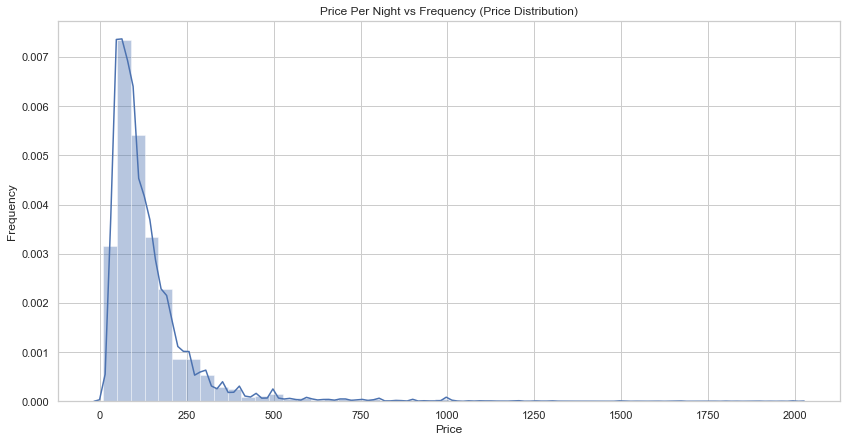

In [7]:
fig, ax = plt.subplots(figsize = (14,7));
sns.distplot(df.price, kde=True, bins=50);
ax.set(xlabel='Price', ylabel='Frequency', title='Price Per Night vs Frequency (Price Distribution)');

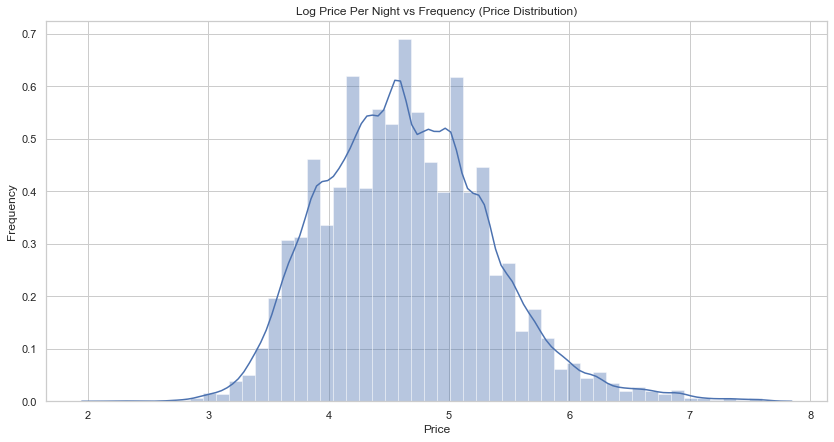

In [8]:
fig, ax = plt.subplots(figsize = (14,7));
sns.distplot(df.log_price, kde=True, bins=50);
ax.set(xlabel='Price', ylabel='Frequency', title='Log Price Per Night vs Frequency (Price Distribution)');


In [9]:
features = list(df.columns) 

In [10]:
features

['host_is_superhost',
 'host_has_profile_pic',
 'host_identity_verified',
 'accommodates',
 'bedrooms',
 'beds',
 'price',
 'has_availability',
 'availability_30',
 'availability_60',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'instant_bookable',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'description_count',
 'host_since_year',
 'log_price',
 'dist_diff',
 'email',
 'facebook',
 'google',
 'government_id',
 'identity_manual',
 'jumio',
 'kba',
 'offline_government_id',
 'phone',
 'reviews',
 'selfie',
 'sent_id',
 'weibo',
 'work_email',
 'zhima_selfie',
 'Airconditioning',
 'BBQgrill',
 'Bathtub',
 'Beachessentials',
 'Beachfront',
 'Bedlinens',
 'Breakfast',
 'Buildingstaff',
 'CableTV',
 'Changingtable',
 'Cleaningbeforecheckout',
 'Coffeemaker',
 'Cookingbasics',
 'Crib',
 'Dishesandsilverware',
 'Dishwasher',
 '

In [11]:
features.remove('price')
features.remove('log_price')


In [12]:
features

['host_is_superhost',
 'host_has_profile_pic',
 'host_identity_verified',
 'accommodates',
 'bedrooms',
 'beds',
 'has_availability',
 'availability_30',
 'availability_60',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'instant_bookable',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'description_count',
 'host_since_year',
 'dist_diff',
 'email',
 'facebook',
 'google',
 'government_id',
 'identity_manual',
 'jumio',
 'kba',
 'offline_government_id',
 'phone',
 'reviews',
 'selfie',
 'sent_id',
 'weibo',
 'work_email',
 'zhima_selfie',
 'Airconditioning',
 'BBQgrill',
 'Bathtub',
 'Beachessentials',
 'Beachfront',
 'Bedlinens',
 'Breakfast',
 'Buildingstaff',
 'CableTV',
 'Changingtable',
 'Cleaningbeforecheckout',
 'Coffeemaker',
 'Cookingbasics',
 'Crib',
 'Dishesandsilverware',
 'Dishwasher',
 'Dryer',
 'Elevator',
 'E

In [13]:
target = dropped_df['price']

In [14]:
# df.drop(columns=['neighbourhood_group_cleansed'], axis=1, inplace=True)

# Linear Model

In [15]:
from sklearn.linear_model import LinearRegression

#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(dropped_df[features], target)

#access output
#print(lm.intercept_)
#print(lm.coef_)
print("R^2: ", lm.score(dropped_df[features], target))

R^2:  0.4878495343862858


In [16]:
X_train, X_test, y_train, y_test = train_test_split(dropped_df[features], target, random_state=9,test_size=0.2)

In [17]:
scaler = StandardScaler()

# fit the scaler to the training data
scaler.fit(X_train)

#transform the training data
X_train = pd.DataFrame(data=scaler.transform(X_train), columns=dropped_df[features].columns)

#transform the testing dat
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=dropped_df[features].columns)

In [18]:
#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

y_train_pred = lm.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 25.417101080924976


In [19]:
#use fitted model to predict on the test examples
y_test_pred = lm.predict(X_test)

#evaluate the predictions on the test examples
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', train_rmse, "vs. Testing: ", test_rmse)

Testing Root Mean Squared Error: 25.305513330167244
Training:  25.417101080924976 vs. Testing:  25.305513330167244


In [ ]:
X_train

In [ ]:
# homoscedistic

In [ ]:
# check for multicollinearity

In [ ]:
('calculated_host_listings_count', -173.4468141114573),
('calculated_host_listings_count_entire_homes', 154.8477833087655),

In [ ]:
lm.coef_[35]

In [ ]:
sns.residplot( y_test, y_test_pred, lowess=True, color="g", line_kws={"color": "red"});

In [ ]:
# amir : when the price is 160, the lowest point on 160, one time i predicted my model was off by -60,
# few times at price 160, i was off by 40. At price 80 is where I am most accurate 



In [ ]:
#Residual Plot above shows that as the price gets higher it gets harder to predict, and our model tends to underestimate 

### Linear Model w/ Log Target Variable

In [ ]:
y_log = np.log(y_train)
y_log

In [ ]:
#instantiate a linear regression object
lm_log = LinearRegression()

#fit the linear regression to the data
lm_log = lm_log.fit(X_train, y_log)

log_train_pred = lm_log.predict(X_train)
log_train_pred

In [ ]:
#log_train_pred the predictions to get them on the same original scale 
y_train_pred = np.exp(log_train_pred)
y_train_pred

In [ ]:
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, log_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

In [ ]:
log_test_pred = lm_log.predict(X_test)
#exponentiate the predictions to get them on the same original scale 
log_test_pred = np.exp(log_test_pred)
log_test_rmse = np.sqrt(metrics.mean_squared_error(y_test, log_test_pred))


print('Testing Root Mean Squared Error:' , log_test_rmse)

In [ ]:
y_test_pred = lm_log.predict(X_test)

#our model predcicte the log of gross, so now we must exponentiate to get the value in $
y_test_pred = np.exp(y_test_pred)

test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', train_rmse, "vs. Testing: ", test_rmse)

# Polynomial Model

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only = True)

In [ ]:
poly_data = poly.fit_transform(dropped_df[features])

In [ ]:
poly_columns = poly.get_feature_names(dropped_df[features].columns)

In [ ]:
df_poly = pd.DataFrame(poly_data, columns=poly_columns)

In [ ]:
df_poly.head()


In [ ]:
## polynomial

from sklearn.model_selection import train_test_split

X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(df_poly, dropped_df['price'], random_state=42, test_size = 0.2)
print("Training set - Features: ", X_poly_train.shape, "Target: ", y_poly_train.shape)
print("Test set - Features: ", X_poly_test.shape, "Target: ",y_poly_test.shape)

#### selecting helpful columns
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
selector = SelectKBest(f_regression, k=20)
selector.fit(X_poly_train, y_poly_train)
selected_col = X_poly_train.columns[selector.get_support()]
 #removed_col = X_poly_train.columns[~selector.get_support()]
print(selected_col)
# print(X_poly_train)
X_poly_train = X_poly_train[selected_col]
X_poly_test = X_poly_test[selected_col]
#print(X_train)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the training data
scaler.fit(X_poly_train) ## Learned the mean and std  -> standarize our values

scaler.fit(X_poly_test)


#transform the training data
X_poly_train = pd.DataFrame(data=scaler.transform(X_poly_train), columns=X_poly_train.columns)

#transform the testing data
X_poly_test = pd.DataFrame(data=scaler.transform(X_poly_test), columns=X_poly_test.columns)
# print(X_poly_train.shape, X_poly_test.shape)



lm_poly_2 = LinearRegression()

#fit the linear regression to the data
lm_poly_2 = lm_poly_2.fit(X_poly_train, y_poly_train)
lm_poly_2



y_poly_train_pred = lm_poly_2.predict(X_poly_train)
y_poly_test_pred = lm_poly_2.predict(X_poly_test)
y_poly_train_pred


#instantiate a linear regression object
from sklearn import metrics

train_poly_rmse = np.sqrt(metrics.mean_squared_error(y_poly_train, y_poly_train_pred))
test_poly_rmse = np.sqrt(metrics.mean_squared_error(y_poly_test, y_poly_test_pred))

print('Training Root Mean Squared Error:' , train_poly_rmse)
print('Test Root mean Sqaured Erro:', test_poly_rmse)


### R SQUARED
print('R-SQUARED:', lm_poly_2.score(X_poly_train, y_poly_train), lm_poly_2.score(X_poly_test, y_poly_test))
test_poly_rmse = test_poly_rmse

In [ ]:
sns.residplot( y_poly_test, y_poly_test_pred, lowess=True, color="g", line_kws={"color": "red"});

# Selecting Best Features for Linear Model 

### F Test

In [ ]:
X_train.shape

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

selector = SelectKBest(f_regression, k=20)

selector.fit(X_train, y_train)

In [ ]:
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]
# X_train = X_train[selected_columns]
# X_test = X_test[selected_columns]

In [ ]:
list(selected_columns)

In [ ]:
#instantiate a linear regression object
lm_kbest = LinearRegression()

#fit the linear regression to the data
lm_kbest = lm_kbest.fit(X_train[selected_columns], y_train)

y_train_kbest = lm_kbest.predict(X_train[selected_columns])


trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))


print('Training Root Mean Squared Error:' , trainK_rmse)

y_kbest = lm_kbest.predict(X_test[selected_columns])

testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))

print('Testing Root Mean Squared Error:' , testK_rmse)


In [ ]:
print('Original: ', test_rmse, '\n',
      "KBest:   ", testK_rmse,'\n')

### Recursive Feature Elimination

In [ ]:
from sklearn.feature_selection import RFECV

In [ ]:
ols = linear_model.LinearRegression()

In [ ]:
# Create recursive feature eliminator that scores features by mean squared errors
selector = RFECV(estimator=ols, step=1, cv=5, scoring='neg_mean_squared_error', n_jobs=-1,verbose=1)

# Fit recursive feature eliminator 
selector.fit(X_train, y_train)

In [ ]:
selected_rfe = X_train.columns[selector.support_]
removed_rfe = X_train.columns[~selector.support_]

In [ ]:
list(selected_rfe)

In [ ]:
#instantiate a linear regression object
lm_rfe = LinearRegression()

#fit the linear regression to the data
lm_rfe = lm_rfe.fit(X_train[selected_rfe], y_train)

y_rfe = lm_rfe.predict(X_train[selected_rfe])


trainRFE_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_rfe))


print('Training Root Mean Squared Error:' , trainRFE_rmse)

y_pred_rfe = lm_rfe.predict(X_test[selected_rfe])

testRFE_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfe))

print('Testing Root Mean Squared Error:' , testRFE_rmse)


In [ ]:
print('Original: ', test_rmse, '\n',
      "KBest:   ", testK_rmse,'\n',
      "RFE:     ", testRFE_rmse)

### Embredded Method: Lasso

In [ ]:
coef = pd.DataFrame(data=lm_rfe.coef_ ).T
coef.columns = selected_rfe

model_coef = coef.T.sort_values(by=0).T
model_coef.plot(kind='bar', title='Modal Coefficients', legend=True, figsize=(16,8),)

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.5, normalize=False)

lasso.fit(X_train,y_train)

y_train_lasso01 = lasso.predict(X_train)
y_test_lasso01 = lasso.predict(X_test)

train_rmse_lasso01 = metrics.mean_absolute_error(y_train, y_train_lasso01)
test_rmse_lasso01 = np.sqrt(metrics.mean_squared_error(y_test, y_test_lasso01))
print('Training Error: '+ str(train_rmse_lasso01) )
print('Testing Error: '+ str(test_rmse_lasso01) )


In [ ]:
lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = X_train.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Model Coefficients', legend=True, figsize=(25,8))

In [ ]:
coeff_df = lasso_coef01.T

coeff_df[coeff_df[0]==0].count()

In [ ]:
## lassoCV
### modeling normal linear regression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dropped_df[features], dropped_df['log_price'], random_state=42, test_size = 0.2)
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)

from sklearn.preprocessing import StandardScaler


#### selecting helpful columns



scaler_normal = StandardScaler()
#print(X_train.shape, y_train.shape)

# fit the scaler to the training data
scaler_normal.fit(X_train) ## Learned the mean and std  -> standarize our values

#transform the training data
X_train = pd.DataFrame(data=scaler_normal.transform(X_train), columns=dropped_df[features].columns)


#transform the testing data
X_test = pd.DataFrame(data=scaler_normal.transform(X_test), columns=dropped_df[features].columns)
# print(X_train.shape, X_test.shape)

from sklearn.linear_model import LassoCV
lm_norm = LassoCV(cv=5,random_state=40)

#fit the linear regression to the data
lm_norm = lm_norm.fit(X_train, y_train)

# how to determine if your model is overfit?
y_train_pred = lm_norm.predict(X_train)
y_test_pred = lm_norm.predict(X_test)

#instantiate a linear regression object
from sklearn import metrics

train_norm_rmse = np.sqrt(metrics.mean_squared_error(np.exp(y_train), np.exp(y_train_pred)))
test_norm_rmse = np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_test_pred)))

print('Training Root Mean Squared Error:' , train_norm_rmse)
print('Test Root Mean Squared Error:' , test_norm_rmse)
print('R-SQUARED: (train)', lm_norm.score(X_train, y_train), '(test)', lm_norm.score(X_test, y_test))
test_lassocv_rmse = test_norm_rmse

In [ ]:
print('Original: \t', test_rmse, '\n',
      "KBest: \t", testK_rmse, '\n',
      "RFE: \t \t", testRFE_rmse, '\n', 
      "Lasso 0.1: \t",  test_rmse_lasso01, '\n',
      "lassoCV:  \t", test_lassocv_rmse, '\n',
      "poly_rmse:  \t", test_poly_rmse 
     )

In [ ]:
## predicting off of the dataset

In [ ]:
y_train_pred = lm_norm.predict(df[features])
y_train_pred
train_norm_rmse = np.sqrt(metrics.mean_squared_error(np.exp(df['log_price']), np.exp(y_train_pred)))
train_norm_rmse

## cant predict when house prices are high

In [ ]:
sns.residplot(df['log_price'], y_train_pred,lowess=True, color="g", line_kws={"color": "red"})

In [ ]:
# this is saying.. amir what is it saying
# we cant see the green line so its hard
# on average, i am predicting too high
# trained the model on low value so on average im gonna predict low
# our model will less likely predict a house over $167 because it has never seen the higher values.
# we know on average we are not gonna predict this.